# Loading, cleaning and describing moisture content field data, and associated HFE weather station data

In [ ]:
import pandas as pd
from datetime import datetime
import hievpy
import os
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
pwd

'/Users/ivanscomp/cloudstor/phd/gadi_workbooks'

In [4]:
# from IPython.display import display
# pd.options.display.max_rows = None # to view whole dataframe

## Import field datasheet

In [5]:
df = pd.read_csv('../diurnal_hfe_study/mc_sief_datasheet - Sheet1.csv',parse_dates=[['date','time'],['nominal_date','nominal_time']],dayfirst=True)
df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y %H:%M',errors='coerce')
df.set_index('date_time',inplace=True)
df.rename(columns={'fresh_weight+bag (mg)':'fresh_weightnbag','chamber_pressure (mPa)':'chamber_pressure','nominal_date_nominal_time':'nominal_time'},inplace=True)
df['surf_moist'] = np.where(df['surf_moist']=='T',True,False)

In [6]:
df

,nominal_time,sample_id,tree_id,ontogeny,surf_moist,fresh_weightnbag,time_fresh,falcon_weight,chamber_pressure,scan_id,...,moistc_oven,moistc_titrat,wind,temp,humidity,vpd,radiation,soil_moisture,rainfall,comments
date_time,,,,,,,,,,,,,,,,,,,,,
2020-11-03 05:20:00,2020-11-03 05:00:00,0,1-1,young,True,11168.0,6.45,40636,0.124,0.1-1.y.jpeg,...,165.2646465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DMSO frezing after adding leaf sample, cold mo..."
2020-11-03 05:20:00,2020-11-03 05:00:00,1,1-1,mature,True,11535.0,6.45,40630,0.042,1.1-1.m.jpeg,...,386.5005299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DMSO frezing after adding leaf sample, cold mo..."
2020-11-03 05:35:00,2020-11-03 05:00:00,2,1-2,young,True,10197.0,6.45,41302,0.051,2.1-2.y.jpeg,...,242.6769963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DMSO frezing after adding leaf sample, cold mo..."
2020-11-03 05:35:00,2020-11-03 05:00:00,3,1-2,mature,True,9295.0,6.45,41299,0.056,3.1-2.m.jpeg,...,69.03170638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DMSO frezing after adding leaf sample, cold mo..."
2020-11-03 05:45:00,2020-11-03 05:00:00,4,1-3,young,True,11231.0,6.45,41029,0.139,4.1-3.y.jpeg,...,169.3113349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DMSO frezing after adding leaf sample, cold mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-19 01:05:00,2020-11-19 01:00:00,91,1-2,mature,False,11028.0,01:44,41226.4,0.275,NaN,...,148.2781522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-19 01:11:00,2020-11-19 01:00:00,92,1-4,young,False,17497.2,01:46,41277.6,0.282,NaN,...,171.5552737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-19 01:11:00,2020-11-19 01:00:00,93,1-4,mature,False,11721.5,01:48,41277.1,0.517,NaN,...,148.8199176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Import environmental data from HFE weather station using the HIEV database api

In [7]:
api_token = os.environ['HIEV_API_KEY']
base_url = 'https://hiev.westernsydney.edu.au/'

In [8]:
enviro = hievpy.search_load_toa5df(api_token,base_url,search_params={'filename':'ROS_WS_Table15min_20201130.dat'})
enviro_oct = hievpy.search_load_toa5df(api_token,base_url,search_params={'filename':'ROS_WS_Table15min_20201031.dat'})

  0%|          | 0/1 [00:00<?, ?it/s]

Loading 1 files:


  0%|          | 0/1 [00:00<?, ?it/s]

Loading 1 files:


100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


In [9]:
enviro.shape

(2400, 13)

In [10]:
enviro_oct.shape

(2976, 13)

### Combine months of data relevant to field campaign

In [11]:
enviro = (pd.concat([enviro,enviro_oct],axis=0)).sort_index()

In [12]:
enviro.shape

(5376, 13)

### Add rainfall and soil moisture volume into field dataframe

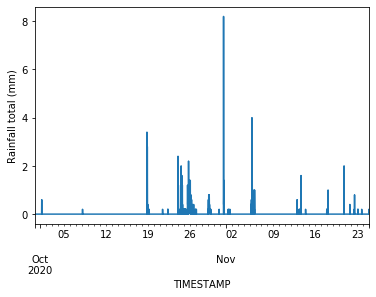

In [13]:
# plot rainfall of time of sampling in 2020
enviro['Rain_mm_Tot'].plot()
plt.ylabel('Rainfall total (mm)')
plt.show()

In [14]:
# rainfall total of data retrieved from weather station
enviro['Rain_mm_Tot'].sum()

148.8

In [15]:
# select rainfall data prior to time of sampling using 24hr, 2 days, 3 days and 21 day periods

In [16]:
# select rain from environmental data for differing length periods before each sample time, add to new columns
df['rain_24h'] = [enviro.loc[dt-pd.Timedelta(hours=24):dt]['Rain_mm_Tot'].sum() for dt in df.index]
df['rain_2d'] = [enviro.loc[dt-pd.Timedelta(hours=48):dt]['Rain_mm_Tot'].sum() for dt in df.index]
df['rain_3d'] = [enviro.loc[dt-pd.Timedelta(hours=72):dt]['Rain_mm_Tot'].sum() for dt in df.index]
df['rain_3w'] = [enviro.loc[dt-pd.Timedelta(days=21):dt]['Rain_mm_Tot'].sum() for dt in df.index]

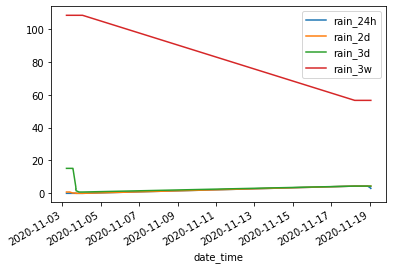

In [17]:
# timeseries by rainfall total preceding each sampling point
df[['rain_24h','rain_2d','rain_3d','rain_3w']].plot()

#### Soil moisture volume

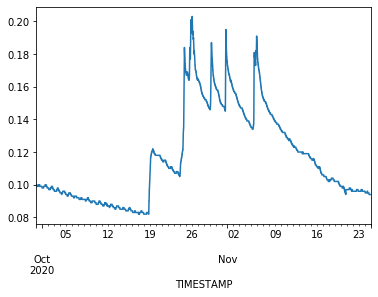

In [18]:
# plot timeseries of all retrieved data
enviro.VW_Avg.plot()

In [19]:
# add soil water volume column for each sample from environmental dataframe
df['soil_moisture'] = [enviro.iloc[enviro.index.get_loc(dt,'nearest')]['VW_Avg'] for dt in df.index] # use pd.Index.get_loc

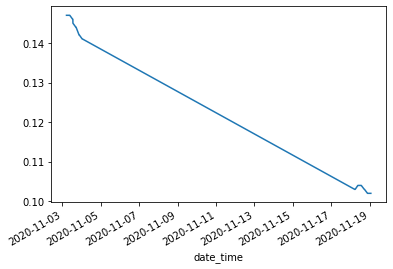

In [20]:
# plot soil moisture volume timeseries of the sampling period
df['soil_moisture'].plot() # units are m^3 m^-3 (volume water per volume soil), ie fraction or percent of water in soil

In [21]:
# import dataframe of air temp, humidity, windspeed and merge into df
# 'ROS_WS_Table05min_20201129.dat'

In [22]:
enviro = hievpy.search_load_toa5df(api_token,base_url,search_params={'filename':'ROS_WS_Table05min_20201130.dat'})
enviro_oct = hievpy.search_load_toa5df(api_token,base_url,search_params={'filename':'ROS_WS_Table05min_20201031.dat'})
enviro = (pd.concat([enviro,enviro_oct],axis=0)).sort_index()

  0%|          | 0/1 [00:00<?, ?it/s]

Loading 1 files:


  0%|          | 0/1 [00:00<?, ?it/s]

Loading 1 files:


100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


In [23]:
enviro.shape

(16126, 14)

In [24]:
enviro.columns

Index(['RECORD', 'PPFD_Avg', 'AirTC_Avg', 'RH', 'WS_ms_Avg', 'WS_ms_Max',
       'WindDir', 'NetSW_Avg', 'NetLW_Avg', 'NetRad_Avg', 'LWmV_Avg',
       'LWMDry_Tot', 'LWMCon_Tot', 'LWMWet_Tot'],
      dtype='object')

In [25]:
df.columns

Index(['nominal_time', 'sample_id', 'tree_id', 'ontogeny', 'surf_moist',
       'fresh_weightnbag', 'time_fresh', 'falcon_weight', 'chamber_pressure',
       'scan_id', 'total_leafarea', 'ziplock_weight', 'fresh_weight',
       'paperbag_weight', 'preoven_weight', 'oven_weight', 'dry_weight', 'lma',
       'sla', 'falcon_weight_empty', 'dmso_weight', 'titra_sample_weight',
       'moistc_oven', 'moistc_titrat', 'wind', 'temp', 'humidity', 'vpd',
       'radiation', 'soil_moisture', 'rainfall', 'comments', 'rain_24h',
       'rain_2d', 'rain_3d', 'rain_3w'],
      dtype='object')

In [26]:
df['wind'] = [enviro.iloc[enviro.index.get_loc(dt,'nearest')]['WS_ms_Avg'] for dt in df.index] # units = m s-1

In [27]:
df['temp'] = [enviro.iloc[enviro.index.get_loc(dt,'nearest')]['AirTC_Avg'] for dt in df.index] # units = dec C

In [28]:
df['humidity'] = [enviro.iloc[enviro.index.get_loc(dt,'nearest')]['RH'] for dt in df.index] # relative humidity unit = % of saturation vapour density

df['vpd'] = ((610.78 * (np.exp(df['temp'] / (df['temp'] + 238.3) * 17.2694)) * df['humidity']) / 100) / 1000 # units = kPa

In [29]:
df['radiation'] = [enviro.iloc[enviro.index.get_loc(dt,'nearest')]['NetRad_Avg'] for dt in df.index] # W m-2

In [30]:
import seaborn as sns

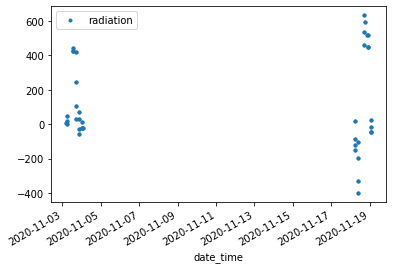

In [31]:
df[['radiation']].plot(marker='.',linestyle='None') # plot of radiation data that matches observation times, includes no data from sensor (~09:00)

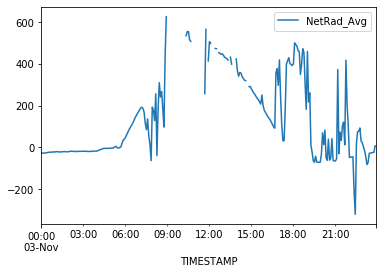

In [32]:
enviro[['NetRad_Avg']].loc['2020-11-03'].plot() # radiation data from weather station showing gaps in data collection during first field campaign

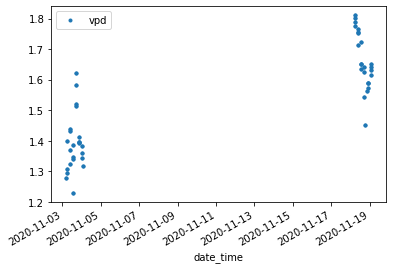

In [33]:
df[['vpd']].plot(marker='.',linestyle='None')

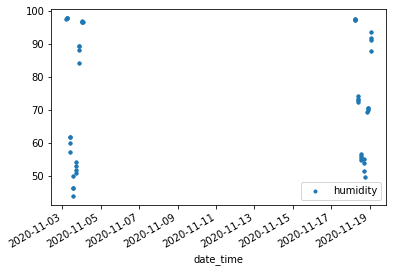

In [34]:
df[['humidity']].plot(marker='.',linestyle='None')

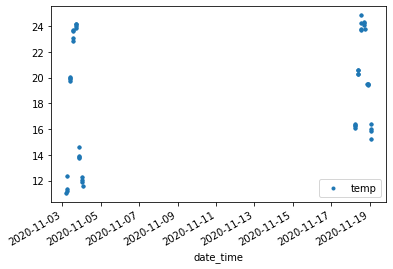

In [35]:
df[['temp']].plot(marker='.',linestyle='None')

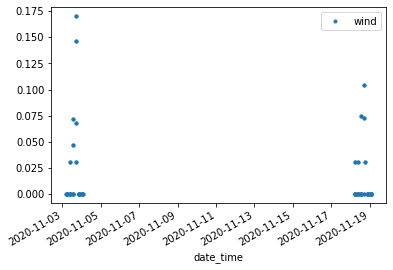

In [36]:
df[['wind']].plot(marker='.',linestyle='None')

### Historic soil moisture

In [105]:
soil = hievpy.search_load_toa5df(api_token,base_url,search_params=
                                 {"from_date":"2018-01-01","to_date":"2021-01-01",'experiment_id': 6,'facility_id': 6,
                                 'variables':'VW_Avg'},
                                 biggish_data=True)

  3%|▎         | 1/35 [00:00<00:05,  6.50it/s]

100%|██████████| 35/35 [00:05<00:00,  6.43it/s]


In [116]:
print('Minimum soil moisture during completed sampling:',df.soil_moisture.min())

Minimum soil moisture during completed sampling: 0.102


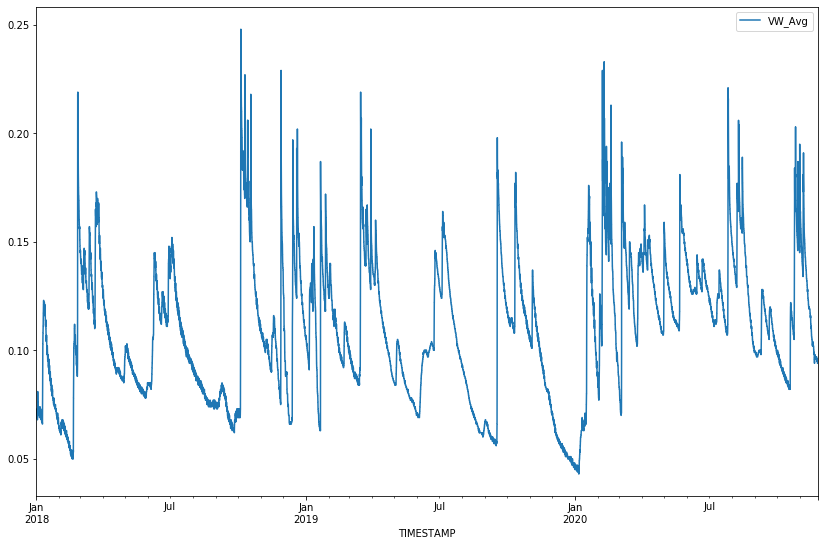

In [115]:
soil[['VW_Avg']].plot(figsize=(14,9)) # check this plot for deciding next sampling time; lower than minimum in completed sampling

## Inspect leaf moisture content (oven method) data

In [37]:
# plot observed moisture content by nominal time - first sampling period only

In [38]:
df['moistc_oven'] = pd.to_numeric(df.moistc_oven,errors='coerce')

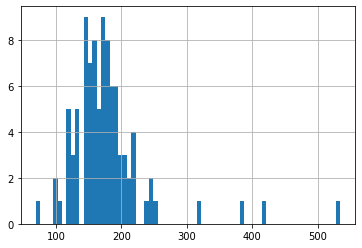

In [39]:
df.moistc_oven.hist(bins=70)

In [40]:
# describe all moisture content data
df['moistc_oven'].describe()

count     95.000000
mean     177.377420
std       62.204431
min       69.031706
25%      146.417668
50%      169.311335
75%      192.127167
max      534.395678
Name: moistc_oven, dtype: float64

In [41]:
# standard error of the mean all moisture content data
print('standard error of the mean',df['moistc_oven'].sem())

standard error of the mean 6.382039999618444


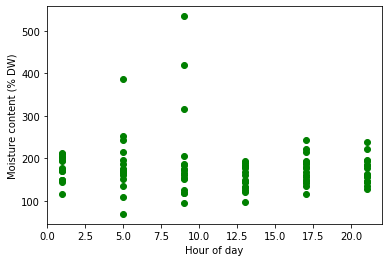

In [42]:
# daily timeseries of moisture content
plt.plot(df['nominal_time'].dt.hour,df['moistc_oven'],'go')
plt.ylabel('Moisture content (% DW)')
plt.xlabel('Hour of day')
plt.show()

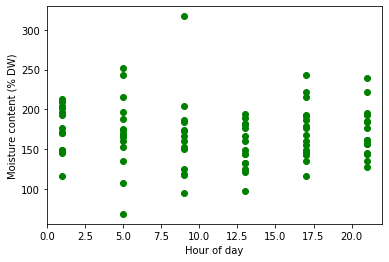

In [43]:
# daily timeseries of moisture content
plt.plot(df[df.moistc_oven < 350]['nominal_time'].dt.hour,df[df.moistc_oven < 350]['moistc_oven'],'go')
plt.ylabel('Moisture content (% DW)')
plt.xlabel('Hour of day')
plt.show()

In [44]:
# describe moisture content data excluding values =>300
df[df.moistc_oven < 350]['moistc_oven'].describe()

count     92.000000
mean     168.585020
std       37.281811
min       69.031706
25%      145.732593
50%      168.487580
75%      188.057938
max      316.868214
Name: moistc_oven, dtype: float64

In [45]:
# standard error of the mean moisture content (<350%) data
print('standard error of the mean',df[df.moistc_oven<350]['moistc_oven'].sem())

standard error of the mean 3.886897518057574


In [46]:
df.nominal_hr

AttributeError: 'DataFrame' object has no attribute 'nominal_hr'

In [ ]:
# daily timeseries of moisture content
df['nominal_hr'] = df.nominal_time.dt.hour

fig, ax = plt.subplots()
df[df.moistc_oven < 350].plot('nominal_hr','moistc_oven', ax=ax, kind='scatter')
plt.ylabel('Moisture content (% DW)')
plt.xlabel('Hour of day')
plt.show()

In [ ]:
# timeseries of moisture content with linear regression model fitted
sns.regplot('nominal_hr','moistc_oven',data=df[df.moistc_oven < 350])
plt.ylabel('Moisture content (% DW)')
plt.xlabel('Hour of day')
plt.show()

In [ ]:
# timeseries of moisture content with locally weighted linear regression (loess) model fitted
sns.regplot('nominal_hr','moistc_oven',data=df[df.moistc_oven < 350],lowess=True)
plt.ylabel('Moisture content (% DW)')
plt.xlabel('Hour of day')
plt.show()

In [ ]:
model = smf.ols('moistc_oven ~ nominal_hr', data=df[df.moistc_oven < 350])
res = model.fit()

In [ ]:
res.summary()

In [ ]:
trend = res.predict()

In [ ]:
# mean MC of each sampling time (nominal) without values equal to or above 350
moistcontent_300 = moistcontent[moistcontent.moistc_oven<350]
moistcontent_300.groupby(moistcontent_300.nominal_time.dt.hour).describe() # does not include positive outliers

In [ ]:
# plot of mean MC of each sampling time (nominal)
moistcontent.groupby(moistcontent.nominal_time.dt.hour).describe().loc[:, (['moistc_oven'], ['mean'])].plot() # may include outliers

In [ ]:
moistcontent.groupby(moistcontent.nominal_time.dt.hour).sem()['moistc_oven']

In [ ]:
# plot of mean MC of each sampling time (nominal)
mean_erro = moistcontent.groupby(moistcontent.nominal_time.dt.hour).describe()#.loc[:, (['moistc_oven'], ['mean','std'])]
mean_erro = mean_erro.transpose().reset_index(level=0,drop=True).transpose()[['mean']]
mean_erro['err'] = moistcontent.groupby(moistcontent.nominal_time.dt.hour).sem()['moistc_oven']
mean_erro.reset_index(inplace=True)

In [ ]:
mean_erro

In [ ]:
plt.errorbar(mean_erro['nominal_time'],mean_erro['mean'],mean_erro['err']) # may include outliers

In [ ]:
# plot of mean MC of each sampling time (nominal)
moistcontent.groupby(moistcontent.nominal_time.dt.hour).describe().loc[:, (['moistc_oven'], ['mean'])]

In [ ]:
# plot of mean MC of each sampling time (nominal)
moistcontent_300.groupby(moistcontent_300.nominal_time.dt.hour).describe().loc[:, (['moistc_oven'], ['mean'])].plot()

In [ ]:
# plot of mean MC of each sampling time (nominal)
moistcontent_300.groupby(moistcontent_300.nominal_time.dt.hour).describe().loc[:, (['moistc_oven'], ['mean'])].plot()

In [ ]:
mean_moist = moistcontent.groupby(moistcontent.nominal_time.dt.hour).describe().loc[:, (['moistc_oven'], ['mean'])]
rnge = mean_moist.max()-mean_moist.min()
print('Difference within day of mean moisture max and min (%DW):',rnge.values[0])

In [ ]:
mean_moist300 = moistcontent_300.groupby(moistcontent_300.nominal_time.dt.hour).describe().loc[:, (['moistc_oven'], ['mean'])]
rnge = mean_moist300.max()-mean_moist300.min()
print('Difference within day of mean moisture max and min (%DW):',rnge.values[0])

In [ ]:
# plot timeseries (nominal) mean MC
# df[['nominal_time','moistc_oven']].set_index('nominal_time').groupby(pd.Timedelta()).mean()#.plot()

In [ ]:
# plot timeseries (nominal) median MC
df.reset_index()[['nominal_time','moistc_oven']].groupby('nominal_time').median().plot()

### Analyse very high values of moisture content (oven) for errors in calculation

In [ ]:
df[df.moistc_oven > 250]

In [ ]:
highmc = df[df.moistc_oven > 250][['fresh_weightnbag','ziplock_weight','fresh_weight','paperbag_weight','preoven_weight','oven_weight','dry_weight','moistc_oven']].sort_values('moistc_oven')

In [ ]:
lowmc = df[df.moistc_oven < 100][['fresh_weightnbag','ziplock_weight','fresh_weight','paperbag_weight','preoven_weight','oven_weight','dry_weight','moistc_oven']].sort_values('moistc_oven')

In [ ]:
lowmc

In [ ]:
highmc # high mc samples (>250) come from different sampling times (5am & 9am), different trees (1-1,1-3,1-4,2-44,2-45)

In [ ]:
# fresh = highmc.fresh_weightnbag - highmc.ziplock_weight
# fresh

In [ ]:
# dry = highmc.oven_weight - highmc.paperbag_weight
# dry

In [ ]:
# fmc = ((fresh-dry)/dry)*100
# fmc

In [ ]:
# diff = (fresh-dry)
# diff

In [ ]:
# plot mean MC along nominal sampling timeseries, while removing all MC values =>350%
df[df.moistc_oven < 350].reset_index()[['nominal_time','moistc_oven']].groupby('nominal_time').mean().plot()

In [ ]:
# plot mean MC along nominal sampling timeseries, while removing all MC values =>350%
df[df.moistc_oven < 350].reset_index()[['nominal_time','moistc_oven']].groupby('nominal_time').mean()

In [ ]:
# plot mean MC along nominal sampling timeseries, while removing all MC values =>350%
df[df.moistc_oven < 350].reset_index()[['nominal_time','moistc_oven']].groupby('nominal_time').mean().plot.bar()

In [ ]:
# plot median MC along nominal sampling timeseries, while removing all MC values =>350%
df[df.moistc_oven < 350].reset_index()[['nominal_time','moistc_oven']].groupby('nominal_time').median().plot()

In [ ]:
# plot median MC along nominal sampling timeseries, while removing all MC values =>350%
df[df.moistc_oven < 350].reset_index()[['nominal_time','moistc_oven']].groupby('nominal_time').median().plot.bar()

## Leaf water potential

In [ ]:
# add new column of leaf water potential (inverse of chamber pressure)
df['leaf_potential'] = 0 - df['chamber_pressure']

In [ ]:
df['leaf_potential'].hist(bins=20)

In [ ]:
df['leaf_potential'].describe()

In [ ]:
df[['ontogeny','leaf_potential']].groupby('ontogeny').describe()

In [ ]:
# daily timeseries of leaf water potential
plt.plot(df['nominal_time'].dt.hour,df['leaf_potential'],'bo')
plt.ylabel('Leaf water potential (mPa)')
plt.xlabel('Hour of day')
plt.show()

In [ ]:
# for comparison with above, daily timeseries of moisture content
plt.plot(df[df.moistc_oven < 300]['nominal_time'].dt.hour,df[df.moistc_oven < 300]['moistc_oven'],'go')
plt.ylabel('Moisture content (% DW)')
plt.xlabel('Hour of day')
plt.show()

In [ ]:
# daily timeseries (nominal times) of moisture content and water potential

In [ ]:
# describe water potential of each sampling time (nominal)
waterpotent = df.reset_index()[['nominal_time','leaf_potential']]
waterpotent.groupby(waterpotent.nominal_time.dt.hour).describe() # may include outliers

In [ ]:
# mean MC of each sampling time (nominal) without values equal to or above 350
moistcontent_300 = moistcontent[moistcontent.moistc_oven<350]
moistcontent_300.groupby(moistcontent_300.nominal_time.dt.hour).describe() # does not include positive outliers

In [47]:
# plot of mean water potential of each sampling time (nominal)
waterpotent.groupby(waterpotent.nominal_time.dt.hour).describe().loc[:, (['leaf_potential'], ['mean'])].plot() # may include outliers

NameError: name 'waterpotent' is not defined

In [ ]:
# plot of mean MC of each sampling time (nominal) - MC < 350%
moistcontent_300.groupby(moistcontent_300.nominal_time.dt.hour).describe().loc[:, (['moistc_oven'], ['mean'])].plot()

In [ ]:
# plot of mean water potential of each sampling time (nominal)
waterpotent.groupby(waterpotent.nominal_time.dt.hour).describe().loc[:, (['leaf_potential'], ['std'])].plot() # may include outliers

In [ ]:
# plot of mean MC of each sampling time (nominal) - MC < 350%
moistcontent_300.groupby(moistcontent_300.nominal_time.dt.hour).describe().loc[:, (['moistc_oven'], ['std'])].plot()

In [ ]:
# # timeseries of mean leaf water potential
# df.reset_index()[['nominal_time','leaf_potential']].groupby('nominal_time').mean().plot()
# plt.ylabel('Leaf water potential (mPa)')
# plt.xlabel('Time of day')
# plt.show()

## Quantify the rate of increase through time in water potential and moisture content after minimum values
 - it appears that moisture content after midday/afternoon lows increases faster than water potential

## Scatterplots of moisture content against all explanatory variables

In [ ]:
plt.scatter(df.leaf_potential,df.moistc_oven)

In [ ]:
plt.scatter(df[df.moistc_oven<350].leaf_potential,df[df.moistc_oven<350].moistc_oven) # where moisture content < 350 %DM

In [ ]:
plt.scatter(df.vpd,df.moistc_oven)

In [ ]:
plt.scatter(df.humidity,df.moistc_oven)

In [ ]:
plt.scatter(df.temp,df.moistc_oven)

In [ ]:
plt.scatter(df.wind,df.moistc_oven)

In [ ]:
plt.scatter(df[df.wind>0].wind,df[df.wind>0].moistc_oven) # where wind > 0

In [ ]:
plt.scatter(df.radiation,df.moistc_oven)

In [ ]:
plt.scatter(df.soil_moisture,df.moistc_oven)

In [ ]:
plt.scatter(df.surf_moist,df.moistc_oven)

In [ ]:
plt.scatter(df.rain_24h,df.moistc_oven)

In [ ]:
plt.scatter(df.rain_2d,df.moistc_oven)

In [ ]:
plt.scatter(df.rain_3d,df.moistc_oven)

In [ ]:
plt.scatter(df.rain_3w,df.moistc_oven)

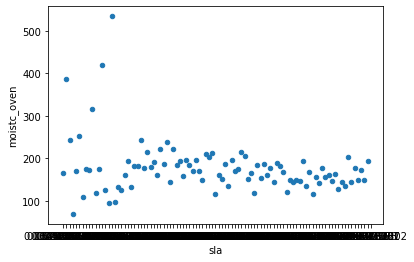

In [48]:
df.plot.scatter(x='sla',y='moistc_oven')

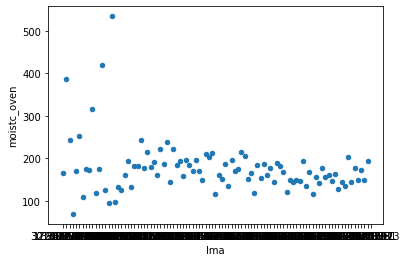

In [49]:
df.plot.scatter(x='lma',y='moistc_oven')

In [50]:
# df.boxplot(column=['lma','sla'],by='ontogeny')

## Vapor pressure deficit

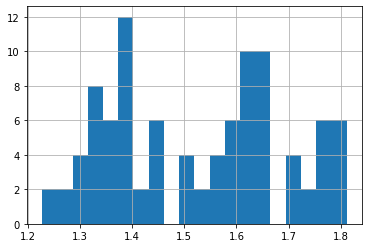

In [51]:
df['vpd'].hist(bins=20)

In [52]:
df['vpd'].describe()

count    96.000000
mean      1.527704
std       0.164977
min       1.227950
25%       1.385701
50%       1.553535
75%       1.644813
max       1.810815
Name: vpd, dtype: float64

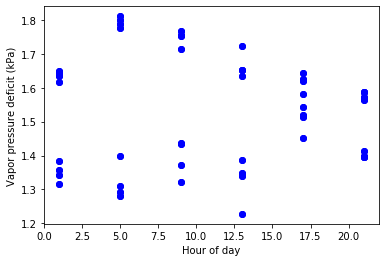

In [53]:
# daily timeseries of leaf water potential
plt.plot(df['nominal_time'].dt.hour,df['vpd'],'bo')
plt.ylabel('Vapor pressure deficit (kPa)')
plt.xlabel('Hour of day')
plt.show()

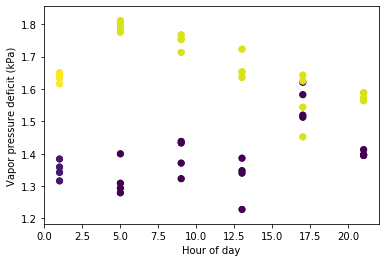

In [54]:
# daily timeseries of leaf water potential
plt.scatter(df['nominal_time'].dt.hour,df['vpd'],c=df['nominal_time'].dt.day)
plt.ylabel('Vapor pressure deficit (kPa)')
plt.xlabel('Hour of day')
plt.show()

## Basic modelling

In [55]:
import numpy as np
import statsmodels.formula.api as smf

In [56]:
df.columns

Index(['nominal_time', 'sample_id', 'tree_id', 'ontogeny', 'surf_moist',
       'fresh_weightnbag', 'time_fresh', 'falcon_weight', 'chamber_pressure',
       'scan_id', 'total_leafarea', 'ziplock_weight', 'fresh_weight',
       'paperbag_weight', 'preoven_weight', 'oven_weight', 'dry_weight', 'lma',
       'sla', 'falcon_weight_empty', 'dmso_weight', 'titra_sample_weight',
       'moistc_oven', 'moistc_titrat', 'wind', 'temp', 'humidity', 'vpd',
       'radiation', 'soil_moisture', 'rainfall', 'comments', 'rain_24h',
       'rain_2d', 'rain_3d', 'rain_3w'],
      dtype='object')

In [57]:
results = smf.ols('leaf_potential ~ moistc_oven', data=df).fit()

PatsyError: Error evaluating factor: NameError: name 'leaf_potential' is not defined
    leaf_potential ~ moistc_oven
    ^^^^^^^^^^^^^^

In [ ]:
results.summary()

In [ ]:
from scipy import stats

In [ ]:
mask = ~np.isnan(df.leaf_potential) & ~np.isnan(df.moistc_oven)

In [ ]:
stats.linregress(df.leaf_potential[mask],df.moistc_oven[mask])

In [ ]:
stats.linregress(df.wind[mask],df.moistc_oven[mask])

In [ ]:
import seaborn as sns

In [ ]:
sns.lmplot('leaf_potential','moistc_oven',data=df)

In [ ]:
df.columns

In [ ]:
results = smf.ols('moistc_oven ~ soil_moisture + vpd + wind + leaf_potential + radiation + rain_24h', data=df).fit()

In [ ]:
results.summary()